<a href="https://colab.research.google.com/github/Herpakka/tagoline/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**median**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


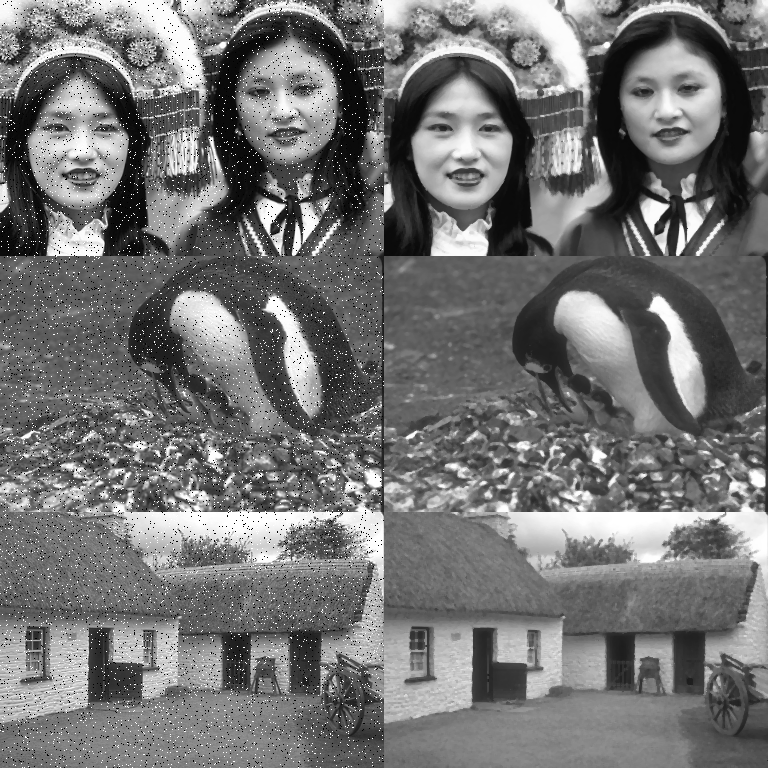

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

def concat_tile(im_list_2d):
    return cv2.vconcat([cv2.hconcat(im_list_h) for im_list_h in im_list_2d])

def median_filter(image, filter_size):
    output = np.zeros(image.shape, dtype=np.uint8)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighbors = []
            for x in range(-filter_size // 2, filter_size // 2 + 1):
                for y in range(-filter_size // 2, filter_size // 2 + 1):
                    if 0 <= i + x < image.shape[0] and 0 <= j + y < image.shape[1]:
                        neighbors.append(image[i + x, j + y])
            output[i, j] = np.median(neighbors)

    return output

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/vision lab1/salt1.png')
image2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/vision lab1/salt2.png')
image3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/vision lab1/salt3.png')

if image is None or image2 is None or image3 is None:
    print("Error: One or more images not loaded successfully.")
else:
    kernel_size = 2
    median = median_filter(image, kernel_size)
    median2 = median_filter(image2, kernel_size)
    median3 = median_filter(image3, kernel_size)

    im_tile = concat_tile([[image, median], [image2, median2], [image3, median3]])
    cv2_imshow(im_tile)

# ส่วนใหม่

**mean**

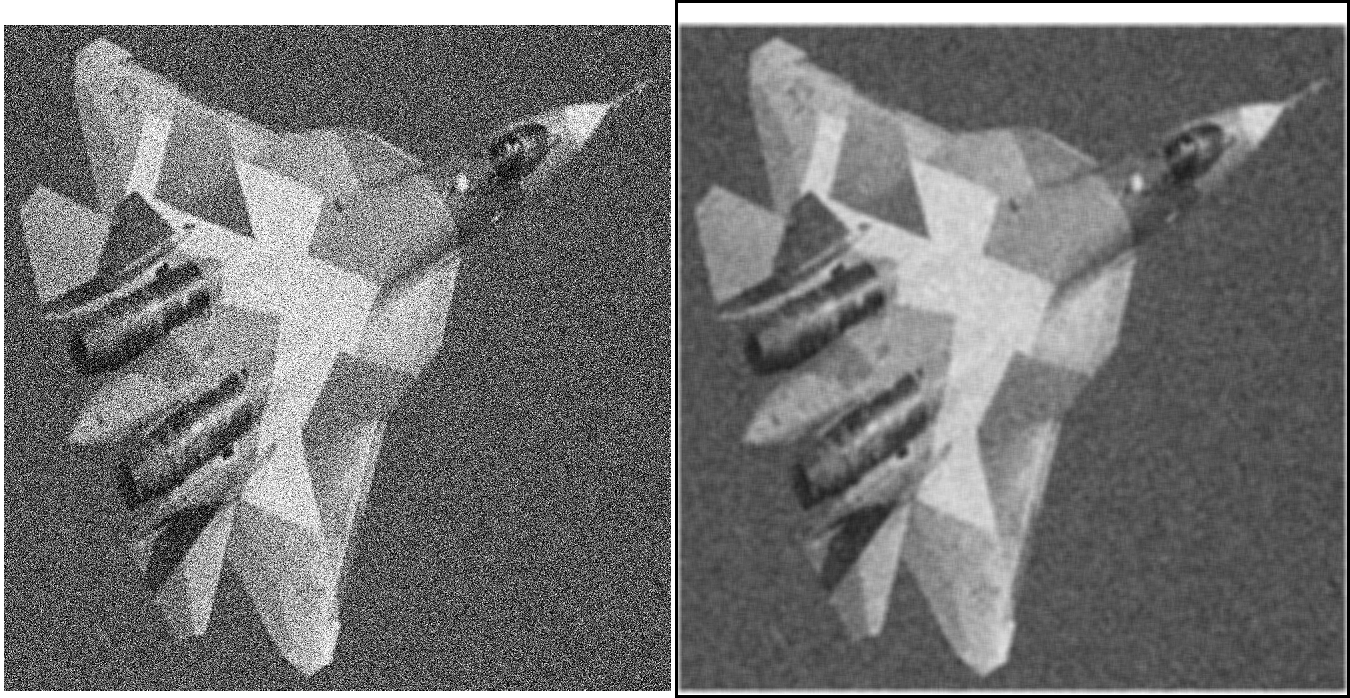

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
def concat_tile(im_list_2d):
    return cv2.vconcat([cv2.hconcat(im_list_h) for im_list_h in im_list_2d])

def custom_blur(image, kernel_size):
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be odd.")
    height, width, channels = image.shape
    blurred_image = np.zeros_like(image, dtype=np.uint8)
    margin = kernel_size // 2
    for i in range(margin, height - margin):
        for j in range(margin, width - margin):
            neighborhood = image[i - margin : i + margin + 1, j - margin : j + margin + 1]
            mean_value = np.mean(neighborhood, axis=(0, 1))
            blurred_image[i, j] = mean_value.astype(np.uint8)
    return blurred_image

# Load image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/vision lab1/gaussian1.png')

# Apply custom median filter
mean = custom_blur(img, 7)

im_tile = concat_tile([[img, mean]])
cv2_imshow(im_tile)